# Regression Test for Concrete Compressive Strength

#### Importing the Dependencies

In [1]:
#Import row
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#### Read the Data

In [2]:
df = pd.read_csv('data/Concrete_Data.csv')
df.head()   #check if data is loaded successfully

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Super_Plastic,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### Explore your data

In [3]:
df.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Super_Plastic,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


**The Concrete test dataset contains 1030 instances and 9 features. This means that there are no missing data since the count is complete for all features. We can also see by visual representation that variance is low which is a good thing as it makes analysis easier**

#### Carry out correlation test

In [4]:
# It will show relationship between each feature
df.corr()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Super_Plastic,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast_Furnace_Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly_Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Super_Plastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse_Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine_Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Concrete_compressive_strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


**Cement, Super Plasticizer, and Age show the most substantial correlations with compressive strength, while Water, Fly Ash, and Coarse Aggregate exhibit weaker correlations.**

In [5]:
X = df.drop(['Concrete_compressive_strength'], axis=1)
y = df.Concrete_compressive_strength 
X.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Super_Plastic,Coarse_Aggregate,Fine_Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


#### Scatter matrix to visualize correlations between features

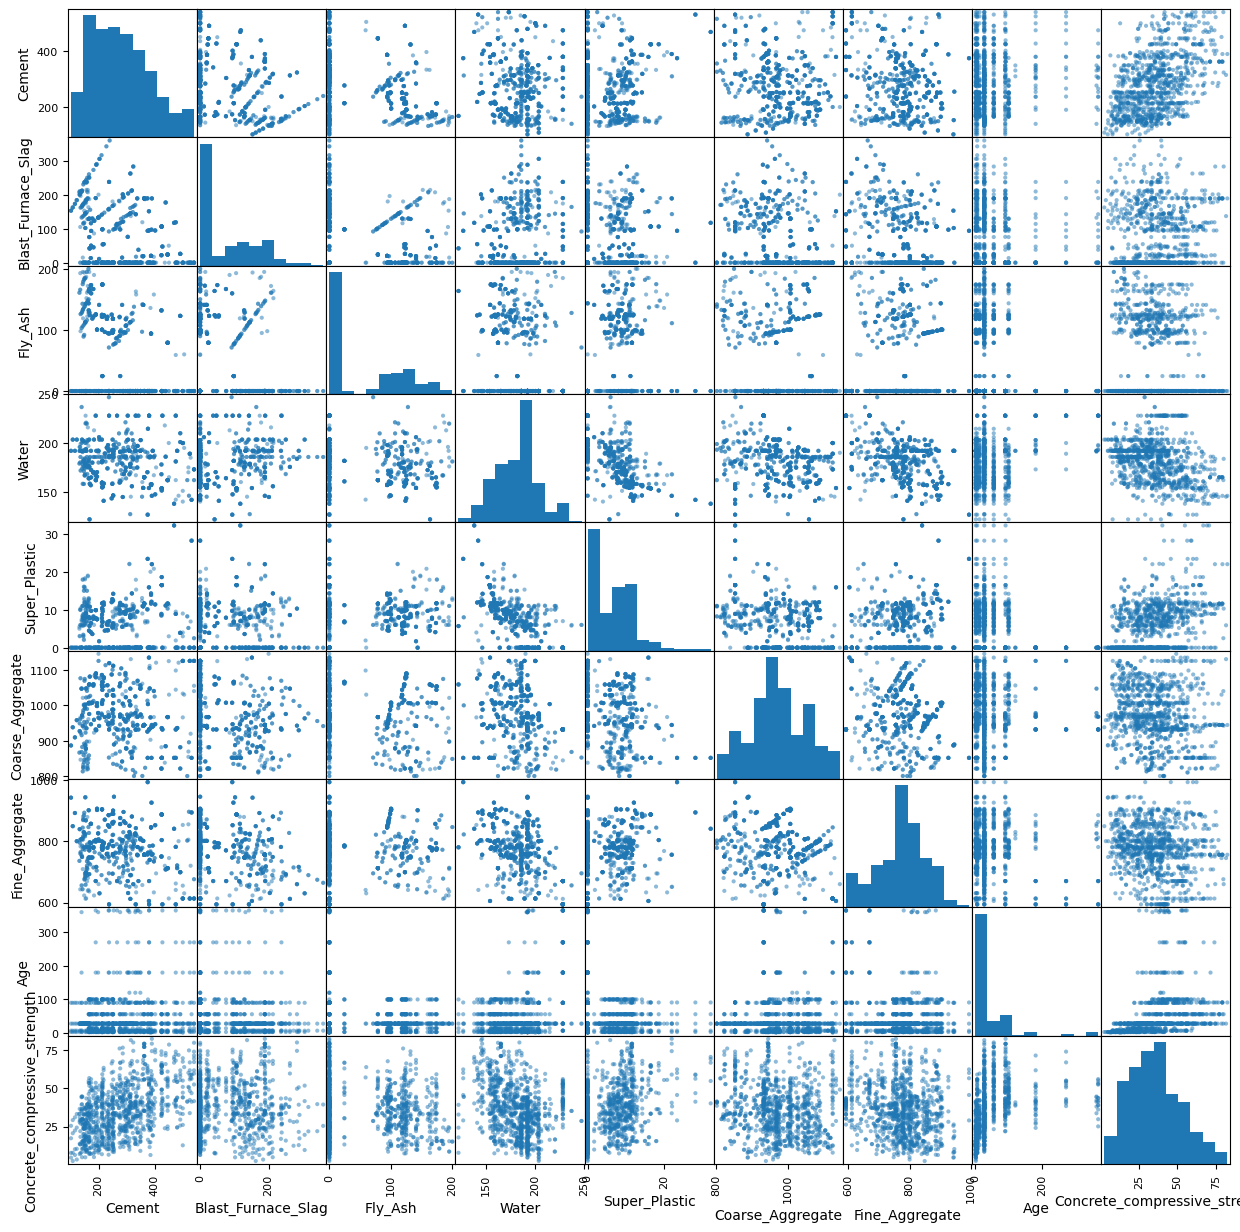

In [6]:
scatter_matrix(df, figsize=(15, 15))
plt.savefig('plots/scatter_plot_concrete.png')

**From the scatter, water plots seem to be the one exhibiting the most visual relationship. For the other features, the plots also looks more like curves which means that we might be benefitting more from a polynomial testing**

#### Visualize the relationship between Cement and Concrete_compressive_strength

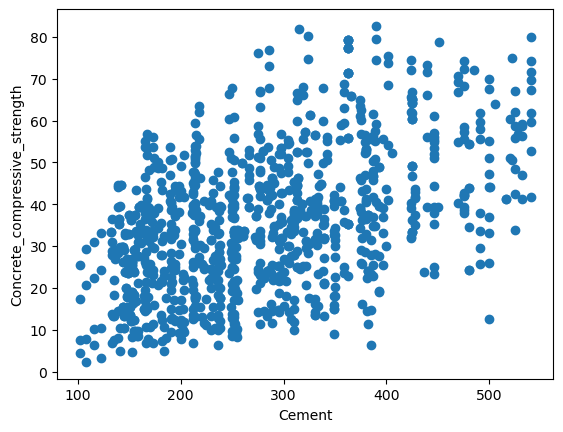

In [7]:
plt.scatter(df.Cement, df.Concrete_compressive_strength)
plt.xlabel("Cement")
plt.ylabel("Concrete_compressive_strength")
plt.show()

#### Start training 

#### Splitting into training and test data and Training Linear Regression model

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
intercept = model.intercept_
coefficient = model.coef_
print(X.columns)
print('intercept:', intercept, 'coefficient:', coefficient)

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Super_Plastic',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age'],
      dtype='object')
intercept: -13.356302642850139 coefficient: [ 0.12198785  0.10524275  0.08729552 -0.15478128  0.33176191  0.01258243
  0.01436308  0.11555199]


#### Make a prediction with Linear features

In [10]:
yhat = model.predict(X_test)

#### Compute Coefficient of Determination which tells you how well your training is performing

In [11]:
r_squared = model.score(X_test, y_test)
rmse = mean_squared_error(y_test, yhat, squared = False)

In [12]:
print('Linear R-squared of test data:', r_squared)
print('Linear RMSE:', rmse)

Linear R-squared of test data: 0.5414805238935221
Linear RMSE: 10.962721175664734


#### Prediction with Polynomial features 

#### We would square all the features whose line of best fit would likely describe a polynomial component, for this reason, we would drop the more linear features

In [13]:
#'Cement', 'Blast_Furnace_Slag','Fly_Ash', 'Fine_Aggregate',
X['Cement_Square'] = np.square(df.Cement)
X['Blast_Furnace_Slag_Square'] = np.square(df.Blast_Furnace_Slag)
X['Fly_Ash_Square'] = np.square(df.Fly_Ash)
X['Fine_Aggregate_Square'] = np.square(df.Fine_Aggregate)

X['Superplastic_Square'] = np.square(df.Super_Plastic)
X['Coarse_Aggregate_Square'] = np.square(df.Coarse_Aggregate)
X['Age_Square'] = np.square(df.Age)
X['Water_Square'] = np.square(df.Water)


#### Splitting into training and test data and Training polynomial model

In [14]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model.fit(X_train, y_train)


LinearRegression()

In [15]:
yhat = model.predict(X_test)

print('Polynomial R squared:', model.score(X,y))
print('Polynomial RMSE', mean_squared_error(y_test, yhat, squared=False))

Polynomial R squared: 0.7721252824632377
Polynomial RMSE 8.393929460353913


**Linear Model Data** 
* Linear R-squared of test data= 0.541480523893522*
* Linear RMSE: 10.962721175664736*

**Polynomial Data**
* Polynomial R squared: 0.7721252824632377*
* Polynomial RMSE 8.393929460353913*

**The polynomial dataset has improved our model performance from 54% to 77%, and dropped error, hereby improving model performance on unseen data**